MAE: 4.99, MSE: 38.00, R2 Score: 0.97


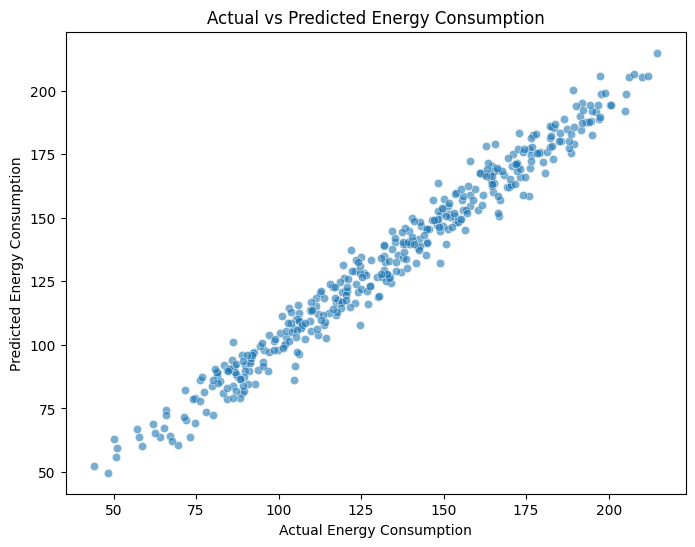

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Generate synthetic dataset
np.random.seed(42)
num_samples = 2000

occupancy = np.random.randint(0, 100, num_samples)  # Number of people in building
temperature = np.random.uniform(15, 35, num_samples)  # Outdoor temperature in °C
humidity = np.random.uniform(30, 80, num_samples)  # Humidity in %
energy_consumption = 50 + occupancy * 1.2 + temperature * 2 - humidity * 0.5 + np.random.normal(0, 5, num_samples)

data = pd.DataFrame({
    "Occupancy": occupancy,
    "Temperature": temperature,
    "Humidity": humidity,
    "Energy_Consumption": energy_consumption
})

# Save dataset
data.to_csv("building_energy_data.csv", index=False)

# Load dataset
df = pd.read_csv("building_energy_data.csv")

# Split into training and test sets
X = df[["Occupancy", "Temperature", "Humidity"]]
y = df["Energy_Consumption"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Model evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}, MSE: {mse:.2f}, R2 Score: {r2:.2f}")

# Plot actual vs predicted values
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.xlabel("Actual Energy Consumption")
plt.ylabel("Predicted Energy Consumption")
plt.title("Actual vs Predicted Energy Consumption")
plt.show()


In [11]:
def energy_saving_tips(temp, humidity, occupancy):
    tips = []
    if temp > 25:
        tips.append("Reduce cooling usage by optimizing HVAC scheduling.")
    if humidity > 60:
        tips.append("Use smart ventilation to regulate humidity levels.")
    if occupancy > 80:
        tips.append("Adjust lighting and HVAC settings based on occupancy trends.")

    return tips if tips else ["Energy consumption is optimal."]

# Example usage
sample = X_test.iloc[0]
print(f"Energy Saving Tips for Given Conditions: {energy_saving_tips(sample['Temperature'], sample['Humidity'], sample['Occupancy'])}")


Energy Saving Tips for Given Conditions: ['Use smart ventilation to regulate humidity levels.', 'Adjust lighting and HVAC settings based on occupancy trends.']
